In [2]:
import pysvg.structure
import pysvg.builders
import pysvg.text
import pysvg.util
from IPython.display import SVG, display
import numpy as np

In [3]:
?pysvg.builders.ShapeBuilder.createPolygon

In [166]:
class Cube:
    def __init__(self, x0, y0, size, fill_color = "rgb(255,255,255)"):
        self.x0=x0
        self.y0=y0
        self.size=size
        self.fill_color = fill_color
        self.stroke_width = self.size/40.0
        self.stroke_color = "black"
        self.shift = self.size/4.0
        
    def addToDocument(self, svg_document):
        shape_builder = pysvg.builders.ShapeBuilder()
        svg_document.addElement(shape_builder.createRect(self.x0+self.shift, self.y0+self.shift,
                                 self.size, self.size,
                                 strokewidth = self.stroke_width,
                                 stroke = self.stroke_color,
                                 fill = self.fill_color))

        pol_points = "%d,%d %d,%d %d,%d %d,%d %d,%d %d,%d"%(self.x0+self.shift,self.y0+self.shift+self.size,
                                                            self.x0,self.y0+self.size, 
                                                            self.x0,self.y0,
                                                            self.x0+self.size,self.y0,
                                                            self.x0+self.size+self.shift,self.y0+self.shift,
                                                            self.x0+self.shift,self.y0+self.shift)
        svg_document.addElement(shape_builder.createPolygon(pol_points,
                                    strokewidth = self.stroke_width,
                                    stroke = self.stroke_color,
                                    fill = self.fill_color))


        l1 = shape_builder.createLine(self.x0,self.y0,self.x0+self.shift,
                                      self.y0+self.shift,
                                      strokewidth=self.stroke_width,
                                      stroke=self.stroke_color)
        svg_document.addElement(l1)
    
    def getJointPointLowerLeft(self, left_shift):
        return (self.x0 + self.shift/2.0 - left_shift, self.y0 + self.size + self.shift/2.0)
    
    def getJointPointLowerRight(self, right_shift):
        return (self.x0 + self.size + self.shift/2.0 + right_shift, self.y0 + self.size + self.shift/2.0)
    
    def get_bottom_left_corner(self):
        return (self.x0 + self.shift ,self.y0+self.shift+ self.size)
    def get_bottom_right_corner(self):
        return (self.x0 + self.shift+ self.size,self.y0+self.shift+ self.size)

In [144]:
class Point:
    def __init__(self, x0, y0, size, fill_color = "rgb(0,0,0)"):
        self.x0=x0
        self.y0=y0
        self.size=size
        self.fill_color = fill_color
        self.stroke_width = self.size/40.0
        self.stroke_color = "black"
    def addToDocument(self, svg_document):
        shape_builder = pysvg.builders.ShapeBuilder()
        svg_document.addElement(shape_builder.createCircle(self. x0, self.y0, self.size,
                                strokewidth = self.stroke_width,
                                stroke = self.stroke_color,
                                fill = self.fill_color))

In [145]:
class Feature:
    def __init__(self, x0, y0, size, fill_color = "rgb(0,0,0)"):
        self.x0=x0
        self.y0=y0
        self.size=size
        self.fill_color = fill_color
        self.stroke_width = 1.0
        self.stroke_color = "black"
                
    def addToDocument(self, svg_document):
        shape_builder = pysvg.builders.ShapeBuilder()
        l1 = shape_builder.createLine(self.x0,self.y0,self.x0+self.size,self.y0,
                                      strokewidth=self.stroke_width,
                                      stroke=self.stroke_color)
        svg_document.addElement(l1)
        
    def getJointPointLowerLeft(self, left_shift):
        #return (self.x0 - left_shift, self.y0)
        return (self.x0, self.y0)
    
    def getJointPointLowerRight(self, right_shift):
        #return (self.x0 +self.size + right_shift, self.y0)
        return (self.x0 +self.size, self.y0)

In [146]:
class Text:
    def __init__(self, x0, y0, text, rotation = 0, fill_color = "rgb(0,0,0)", font_size="16px", font_style='normal'):
        self.x0=x0
        self.y0=y0        
        self.fill_color = fill_color
        self.text = text
        self.rotation = rotation
        self.font_size = font_size
        self.font_style = font_style
        
    def addToDocument(self, svg_document):      
        style = pysvg.builders.StyleBuilder()
        style.setFontSize(self.font_size)
        style.setFontFamily("Arial")
        style.setFontStyle(self.font_style)
        transform = pysvg.builders.TransformBuilder()
        transform.setRotation(self.rotation)
        transform.setTranslation("%d, %d"%(self.x0,self.y0))
        text = pysvg.text.Text(self.text, x = 0, y = 0)
        text.set_style(style.getStyle())
        text.set_transform(transform.getTransform())
        #print text.getXML()
        svg_document.addElement(text)


In [167]:
class InputLayer:
    def __init__(self, x0, y0, n_cubes, cube_size, gap_x, gap_y, fill_colors = [], annotations = []):
        self.x0=x0
        self.y0=y0
        self.cube_size = cube_size
        self.n_cubes = n_cubes
        self.fill_colors = fill_colors
        self.annotations = annotations
        self.cubes = []
        self.text = []
        self.gap_x = gap_x
        self.gap_y = gap_y
        self.text_width = 15
        self.text_height = 10
        
    def constructLayer(self):
        for i in xrange(self.n_cubes):
            cb = Cube(self.x0+i*self.gap_x, self.y0+i*self.gap_y, self.cube_size)
            cb.fill_color = self.fill_colors[i]
            txt_x0, txt_y0 = cb.getJointPointLowerLeft(self.text_width)
            txt = Text(txt_x0, txt_y0 + self.text_height, self.annotations[i])
            self.text.append(txt)
            self.cubes.append(cb)
            
    def addToDocument(self, svg_document):
        for cb,txt in zip(self.cubes, self.text):
            cb.addToDocument(svg_document)
            txt.addToDocument(svg_document)
            
    def get_bottom_left_corner(self):
        return self.cubes[-1].get_bottom_left_corner()
    def get_bottom_right_corner(self):
        return self.cubes[-1].get_bottom_right_corner()

In [168]:
class FlatLayer:
    def __init__(self, x0, y0, n_features, width, gap_x, gap_y, fill_color):
        self.x0=x0
        self.y0=y0
        self.width = width
        self.n_features = n_features
        self.fill_color = fill_color
        self.stroke_color = fill_color
        self.stroke_width = 1
        self.cubes = []
        self.gap_x = gap_x
        self.gap_y = gap_y
        
    def constructLayer(self):
        for i in xrange(self.n_features):
            cb = Feature(self.x0+i*self.gap_x, self.y0+i*self.gap_y, self.width)
            self.cubes.append(cb)
            
    def addToDocument(self, svg_document):
        shape_builder = pysvg.builders.ShapeBuilder()
        pol_points = "%d,%d %d,%d %d,%d %d,%d"%(  self.x0,self.y0,
                                            self.x0+self.width,self.y0, 
                                            self.x0+self.width+(self.n_features-1)*self.gap_x,
                                            self.y0+(self.n_features-1)*self.gap_y,
                                            self.x0+(self.n_features-1)*self.gap_x,
                                            self.y0+(self.n_features-1)*self.gap_y)
        svg_document.addElement(shape_builder.createPolygon(pol_points,
                                    strokewidth = 0,
                                    stroke = self.stroke_color,
                                    fill = self.fill_color))
        
        for cb in self.cubes:
            cb.addToDocument(svg_document)
            
    def get_bottom_left_corner(self):
        return self.x0+(self.n_features-1)*self.gap_x, self.y0+(self.n_features-1)*self.gap_y
    def get_bottom_right_corner(self):
        return self.x0+(self.n_features-1)*self.gap_x, self.y0+(self.n_features-1)*self.gap_y
        

In [169]:
class Layer:
    def __init__(self, x0, y0, n_cubes, cube_size, gap_x, gap_y, fill_colors = ["rgb(255,255,255)", "rgb(150,150,150)"]):
        self.x0=x0
        self.y0=y0
        self.cube_size = cube_size
        self.n_cubes = n_cubes
        self.fill_colors = fill_colors
        self.cubes = []
        self.gap_x = gap_x
        self.gap_y = gap_y
        self.size_threshold = 6
        self.point_size = 2
        self.points = []
        
    def constructLayer(self):
        if self.n_cubes <= self.size_threshold:
            for i in xrange(self.n_cubes):
                cb = Cube(self.x0+i*self.gap_x, self.y0+i*self.gap_y, self.cube_size)
                cb.fill_color = self.fill_colors[i%len(self.fill_colors)]
                
                self.cubes.append(cb)
        else:
            for i in xrange(self.size_threshold/2):
                cb = Cube(self.x0+i*self.gap_x, self.y0+i*self.gap_y, self.cube_size)
                self.cubes.append(cb)
            
            cube_shift_x = -self.cubes[-1].shift/2.0
            cube_shift_y = -self.cubes[-1].shift/2.0
            
            points_x0 = self.x0 + self.size_threshold*self.gap_x/2 + self.cube_size + cube_shift_x
            points_y0 = self.y0 + self.size_threshold*self.gap_y/2 + self.cube_size + cube_shift_y
            
            gap_point = 5
            points_gap_x = 5*gap_point+self.cube_size
            points_gap_y = 5*gap_point+self.cube_size
            for i in range(1, 4):
                pnt = Point(points_x0+i*gap_point, points_y0+i*gap_point, self.point_size)
                self.points.append(pnt)
                
            for i in range(self.size_threshold/2, self.size_threshold):
                cb = Cube(self.x0+i*self.gap_x+points_gap_x, 
                          self.y0+i*self.gap_y+points_gap_y, self.cube_size)
                self.cubes.append(cb)
                
            for i, cb in enumerate(self.cubes):
                cb.fill_color = self.fill_colors[i%len(self.fill_colors)]
                    
    def addToDocument(self, svg_document):
        if self.n_cubes <= self.size_threshold:
            for cb in self.cubes:
                cb.addToDocument(svg_document)
        else:
            for i in xrange(self.size_threshold/2):
                self.cubes[i].addToDocument(svg_document)
            for pnt in self.points:
                pnt.addToDocument(svg_document)
            for i in range(self.size_threshold/2, self.size_threshold):
                self.cubes[i].addToDocument(svg_document)
    def get_bottom_left_corner(self):
        return self.cubes[-1].get_bottom_left_corner()
    def get_bottom_right_corner(self):
        return self.cubes[-1].get_bottom_right_corner()

In [150]:
class Arrow:
    def __init__(self, x0, y0, x1, y1, arrow_angle=15.0, arrow_length_prop=0.15):
        self.x0 = x0
        self.x1 = x1
        self.y0 = y0
        self.y1 = y1
        self.stroke_width = 2.0
        self.stroke_color = "gray"
        
        self.arrow_angle = arrow_angle
        self.arrow_length_prop = arrow_length_prop
        
        
    def addToDocument(self,svg_document):
        dist = np.sqrt( float( (self.x1-self.x0)*(self.x1-self.x0) + (self.y1-self.y0)*(self.y1-self.y0) ))
        arrow_length = 10
        angle_0 = np.arctan( (self.y1-self.y0)/float((self.x1-self.x0)))
        angle =  np.pi*self.arrow_angle/180.0
        shape_builder = pysvg.builders.ShapeBuilder()
        l1 = shape_builder.createLine(self.x0, self.y0, self.x1, self.y1, self.stroke_width, self.stroke_color)
        l1_p = shape_builder.createLine(self.x1, self.y1,
                                        self.x1-arrow_length*np.cos(angle_0-angle), 
                                        self.y1-arrow_length*np.sin(angle_0-angle), 
                                        strokewidth = self.stroke_width,
                                        stroke = self.stroke_color)
        l1_m = shape_builder.createLine(self.x1, self.y1,
                                        self.x1-arrow_length*np.cos(angle_0+angle), 
                                        self.y1-arrow_length*np.sin(angle_0+angle), 
                                        strokewidth = self.stroke_width,
                                        stroke = self.stroke_color)
        svg_document.addElement(l1)
        svg_document.addElement(l1_p)
        svg_document.addElement(l1_m)
                                    
        

In [151]:
class Connection:
    def __init__(self, layer1, layer2, connection_type="convolution", shift_l1=10, shift_l2=10, 
                 stroke_width = 0.5, stroke_color = "black"):
        self.layer1 = layer1
        self.layer2 = layer2
        self.connection_type = connection_type
        self.shift_l1 = shift_l1
        self.shift_l2 = shift_l2
        self.stroke_width = stroke_width
        self.stroke_color = stroke_color
        
    def addToDocument(self, svg_document):
        shape_builder = pysvg.builders.ShapeBuilder()
        if self.connection_type == "convolution":
            for cb_l1 in self.layer1.cubes:
                for cb_l2 in self.layer2.cubes:
                    x_l1, y_l1 = cb_l1.getJointPointLowerRight(self.shift_l1)
                    x_l2, y_l2 = cb_l2.getJointPointLowerLeft(self.shift_l2)
                    l1 = shape_builder.createLine(x_l1, y_l1, x_l2, y_l2,
                                                  strokewidth=self.stroke_width,
                                                  stroke=self.stroke_color)
                    svg_document.addElement(l1)
        if self.connection_type == "max_out":
            if len(self.layer1.cubes)!=len(self.layer2.cubes):
                print 'Max_Out: Not equal number of filters in two layers!'
            for cb_l1, cb_l2 in zip(self.layer1.cubes, self.layer2.cubes):
                x_l1, y_l1 = cb_l1.getJointPointLowerRight(self.shift_l1)
                x_l2, y_l2 = cb_l2.getJointPointLowerLeft(self.shift_l2)
                arrow = Arrow(x_l1, y_l1, x_l2, y_l2)
                arrow.addToDocument(svg_document)

In [201]:
class AnnotatedLayer:
    def __init__(self, x0, y0, cube_size, gap_x, gap_y, color = False, annotation = [], caption_font_size = "20px"):
        n_cubes=11        
        if color:
            self.layer = Layer(x0, y0, n_cubes, cube_size, gap_x, gap_y,
              fill_colors = ["rgb(150,150,150)","rgb(150,150,220)", "rgb(220,150,150)","rgb(150,220,150)"])
        else:
            self.layer = Layer(x0, y0, n_cubes, cube_size, gap_x, gap_y)
        self.layer.constructLayer()
        
        text_x0, text_y0 = self.layer.get_bottom_left_corner()
        text_x0 += 10
        text_y0 += 10
        self.captions = []
        for i, ann in enumerate(annotation):
            self.captions.append(Text(text_x0+20*i, text_y0, ann, rotation=45, font_size=caption_font_size, font_style='oblique'))

    def addToDocument(self, svg_document):
        self.layer.addToDocument(svg_document)
        for caption in self.captions:
            caption.addToDocument(svg_document)
            
class AnnotatedConnection:
    def __init__(self, layer1, layer2, connection_type, stroke_width, annotation=[], caption_font_size="20px"):
        self.connection = Connection(layer1, layer2, connection_type, stroke_width=stroke_width)
        
        font_size_int = int(caption_font_size[:2])
        
        text_x0, text_y0 = layer1.get_bottom_right_corner()
        text_x1, text_y1 = layer2.get_bottom_left_corner()
        text_x = (text_x0 + text_x1)/2 - font_size_int*(len(annotation)+1)/2
        text_y = np.max([text_y0,text_y1]) + 5
        self.captions=[]
        for i, ann in enumerate(annotation):
            self.captions.append(Text(text_x+20*i, text_y, ann, rotation=45, font_size=caption_font_size, font_style='oblique'))
            
    def addToDocument(self, svg_document):
        self.connection.addToDocument(svg_document)
        for caption in self.captions:
            caption.addToDocument(svg_document)
            
class AnnotatedFlatLayer:
    def __init__(self, x0, y0, n_features, gap_x, gap_y, color = False, annotation = [], caption_font_size = "20px"):
        width = 10
        fill_color = "rgb(180,180,180)"
        self.layer = FlatLayer(x0, y0, n_features, width, gap_x, gap_y, fill_color)
        self.layer.constructLayer()
        
        text_x0 = x0+(n_features-1)*gap_x
        text_y0 = y0+(n_features-1)*gap_y + 5
        
        self.captions = []
        for i, ann in enumerate(annotation):
            self.captions.append(Text(text_x0+20*i, text_y0, ann, rotation=45, font_size=caption_font_size, font_style='oblique'))

    def addToDocument(self, svg_document):
        self.layer.addToDocument(svg_document)
        for caption in self.captions:
            caption.addToDocument(svg_document)

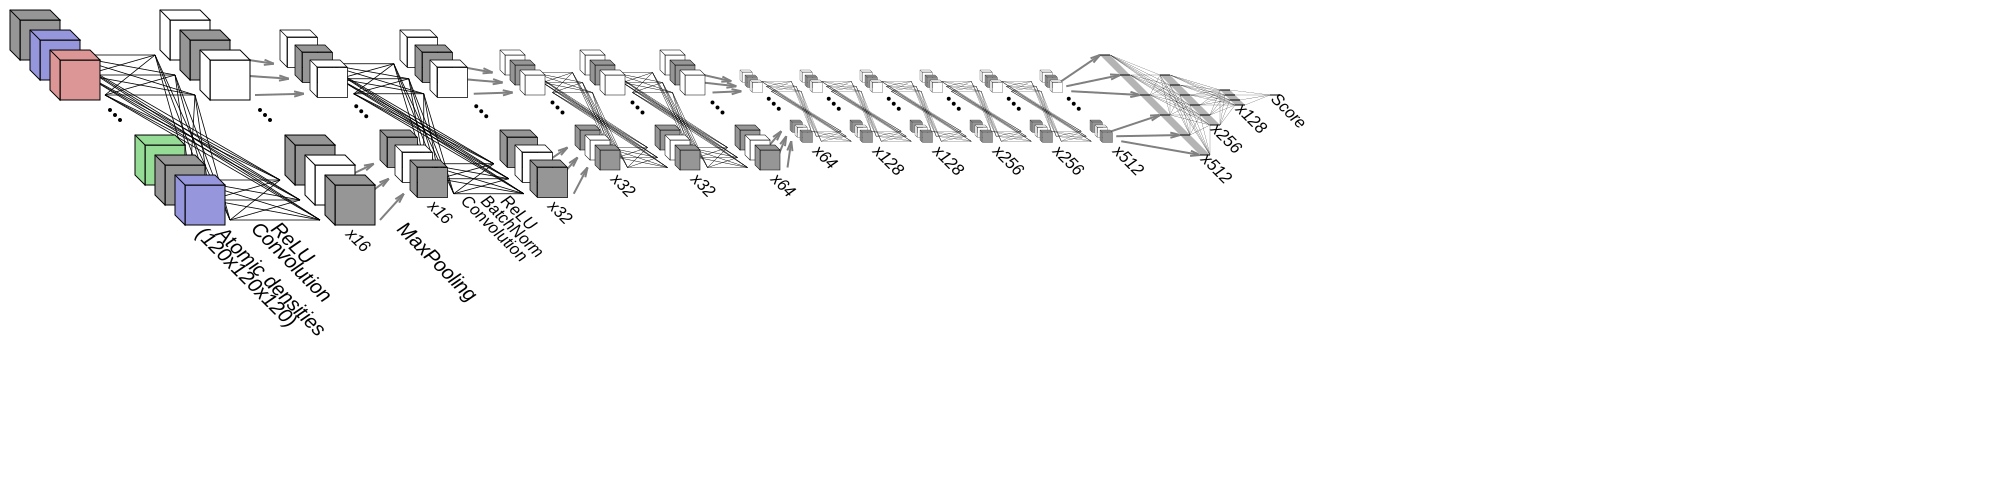

In [203]:
svg_document = pysvg.structure.Svg(height=500, width=2000)

x0 = 10
y0 = 10
n_cubes = 11
cube_size = 40
gap_x = 20
gap_y = 20
caption_font_size = "16px"
caption_font_size1 = "20px"

text_x0 = 200
text_y0 = 240

layer1 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=True,annotation=["(120x120x120)", "Atomic densities"])
x0+=150
layer2 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x16"], caption_font_size = "16px")

cube_size-=10
x0+=120
y0+=20
gap_x-=5
gap_y-=5

layer3 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x16"], caption_font_size = "16px")
x0+=120
layer4 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x32"], caption_font_size = "16px")

cube_size-=10
x0+=100
y0+=20
gap_x-=5
gap_y-=5

layer5 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x32"], caption_font_size = "16px")
x0+=80
layer6 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x32"], caption_font_size = "16px")
x0+=80
layer7 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x64"], caption_font_size = "16px")

cube_size-=10
x0+=80
y0+=20
gap_x-=5
gap_y-=5

layer8 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x64"], caption_font_size = "16px")
x0+=60
layer9 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x128"], caption_font_size = "16px")
x0+=60
layer10 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x128"], caption_font_size = "16px")
x0+=60
layer11 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x256"], caption_font_size = "16px")
x0+=60
layer12 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x256"], caption_font_size = "16px")
x0+=60
layer13 = AnnotatedLayer(x0,y0,cube_size,gap_x,gap_y,color=False,annotation=["x512"], caption_font_size = "16px")


x0+=60
y0-=15
layer14 = AnnotatedFlatLayer(x0,y0, 6, 20, 20,color=False,annotation=["x512"], caption_font_size = "16px")
x0+=60
y0+=20
layer15 = AnnotatedFlatLayer(x0,y0, 6, 10, 10,color=False,annotation=["x256"], caption_font_size = "16px")
x0+=60
y0+=15
layer16 = AnnotatedFlatLayer(x0,y0, 4, 5, 5,color=False,annotation=["x128"], caption_font_size = "16px")
x0+=50
y0+=5
layer17 = AnnotatedFlatLayer(x0,y0, 1, 5, 5,color=False,annotation=["Score"], caption_font_size = "16px")



connection1 = AnnotatedConnection(layer1.layer, layer2.layer, "convolution", 0.8, annotation = ["Convolution", "ReLU"])
connection2 = AnnotatedConnection(layer2.layer, layer3.layer, "max_out", 1.0, annotation = ["","","MaxPooling"])
connection3 = AnnotatedConnection(layer3.layer, layer4.layer, "convolution", 0.8, annotation = ["Convolution", "BatchNorm", "ReLU"],caption_font_size="16px")
connection4 = AnnotatedConnection(layer4.layer, layer5.layer, "max_out", 1.0)
connection5 = AnnotatedConnection(layer5.layer, layer6.layer, "convolution", 0.4)
connection6 = AnnotatedConnection(layer6.layer, layer7.layer, "convolution", 0.4)
connection7 = AnnotatedConnection(layer7.layer, layer8.layer, "max_out", 0.2)
connection8 = AnnotatedConnection(layer8.layer, layer9.layer, "convolution", 0.2)
connection9 = AnnotatedConnection(layer9.layer, layer10.layer, "convolution", 0.2)
connection10 = AnnotatedConnection(layer10.layer, layer11.layer, "convolution", 0.2)
connection11 = AnnotatedConnection(layer11.layer, layer12.layer, "convolution", 0.2)
connection12 = AnnotatedConnection(layer12.layer, layer13.layer, "convolution", 0.2)
connection13 = AnnotatedConnection(layer13.layer, layer14.layer, "max_out", 0.2)
connection14 = AnnotatedConnection(layer14.layer, layer15.layer, "convolution", 0.2)
connection15 = AnnotatedConnection(layer15.layer, layer16.layer, "convolution", 0.2)
connection16 = AnnotatedConnection(layer16.layer, layer17.layer, "convolution", 0.2)

connection1.addToDocument(svg_document)
connection2.addToDocument(svg_document)
connection3.addToDocument(svg_document)
connection4.addToDocument(svg_document)
connection5.addToDocument(svg_document)
connection6.addToDocument(svg_document)
connection7.addToDocument(svg_document)
connection8.addToDocument(svg_document)
connection9.addToDocument(svg_document)
connection10.addToDocument(svg_document)
connection11.addToDocument(svg_document)
connection12.addToDocument(svg_document)
connection13.addToDocument(svg_document)
connection14.addToDocument(svg_document)
connection15.addToDocument(svg_document)
connection16.addToDocument(svg_document)
layer1.addToDocument(svg_document)
layer2.addToDocument(svg_document)
layer3.addToDocument(svg_document)
layer4.addToDocument(svg_document)
layer5.addToDocument(svg_document)
layer6.addToDocument(svg_document)
layer7.addToDocument(svg_document)
layer8.addToDocument(svg_document)
layer9.addToDocument(svg_document)
layer10.addToDocument(svg_document)
layer11.addToDocument(svg_document)
layer12.addToDocument(svg_document)
layer13.addToDocument(svg_document)
layer14.addToDocument(svg_document)
layer15.addToDocument(svg_document)
layer16.addToDocument(svg_document)
layer17.addToDocument(svg_document)





svg_document.save("ConvnetDiagramFinal.svg")
display(SVG("ConvnetDiagramFinal.svg"))